## Project - Applying Data Science Methodology on Red Wine Quality Dataset

<img src="https://media.giphy.com/media/jRuv9xc10lVyE/giphy.gif">

You can read more about the Data Science Methodology from this [IBM whitepaper](https://tdwi.org/~/media/64511A895D86457E964174EDC5C4C7B1.PDF) by John Rollins

[Link](https://archive.ics.uci.edu/ml/datasets/wine+quality) for the dataset for context

<img src="https://media-exp1.licdn.com/dms/image/C4D12AQGOPVf5iqhhwQ/article-inline_image-shrink_1000_1488/0/1597756152693?e=1652918400&v=beta&t=iKZ2jX3khsx11lD9JyZWDz-j-Gt2hZsKPXz5rZ0iE1M">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. 

The goal is to implement Regression Models and Classification Models on the Red Wine Quality Dataset to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach
Based on the above business understanding one should decide the analytical approach to follow. The approaches can be of 4 types: Descriptive approach (current status and information provided), Diagnostic approach(a.k.a statistical analysis, what is happening and why it is happening), Predictive approach(it forecasts on the trends or future events probability) and Prescriptive approach( how the problem should be solved actually).

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

*I would take Descriptive approach as we yet do not know what information are useful and have high impact on our wine quality. We are just presented with the raw data and descriptive approach would enable us to have an understanding of the potential relationships between variables and also helps us to present the data in a more meaningful way. After our analysis is finished, we would do the modellings.*

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

*We need a data which has many features like the physiochemical attributes (acidity, pH level, sugar, etc) so that we would have enough features to play around with to determine the features that are the best quality red wine indicators.*

### Data Collection

**Q3. From where do we get our data?**

*We get our data from Wine Quality Dataset which is gathered by:*

- *Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez*

- *A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal
@2009*

*and is accessible on UCI ML repository via this link https://archive.ics.uci.edu/ml/datasets/wine+quality*

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

*The red wine samples were obtained from the north of Portugal to model red wine quality based on physicochemical tests. The dataset is related to the red variant of Portuguese "Vinho Verde" wine.*

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

*Knowing the impact of each variable would help businesses(producers, distributors, etc) better assess their production, distribution, and pricing strategy.*


<li>Check the shape of data, and the datatypes of the features</li>
<li>Understand the data by carrying out any steps that you think are necessary</li>

In [1]:
import matplotlib.pyplot as plt
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from sklearn.preprocessing import normalize, StandardScaler
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.model_selection import GridSearchCV

wine = pd.read_csv("winequality-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
# The shape of data
print('Number of samples: ', wine.shape[0])
print('Number of features: ', wine.shape[1])


Number of samples:  1599
Number of features:  12


In [3]:
# The datatypes of the features
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


From the below table, we can see that the data in our dataset is not distributed well and we have a lot more medium quality wines than the very high or low quality wines.

In [4]:
# understanding the data
print(list(wine.columns))
wine['quality'].value_counts()

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

As we can see in the graphs below, generally, when there is low volatile acidity, chlorides, density, and pH, the quality of the wine is higher and with the increase in citric acid, sulphates, and alcohol the quality becomes higher. The residual sugar does not have much of a impact; as we can see in the graph of `residual sugar Vs. quality`, across different wine qualities, the residual sugar remains the same. The rest of the features have a mixture of behaviours regarding their impact on the quality.

<Figure size 432x288 with 0 Axes>

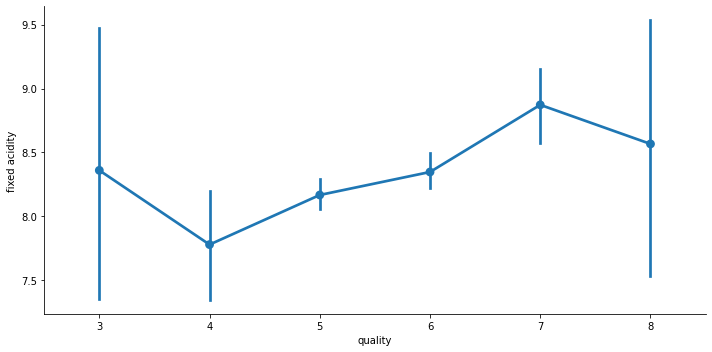

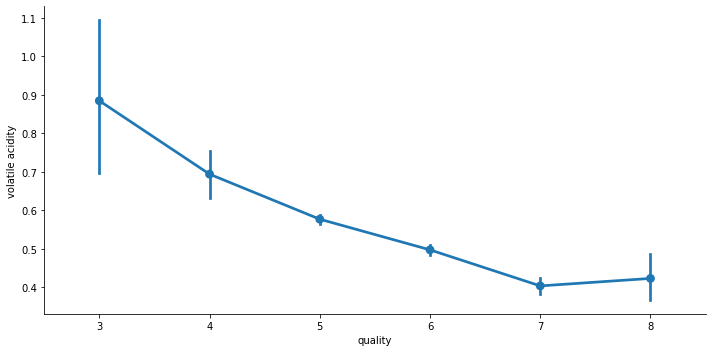

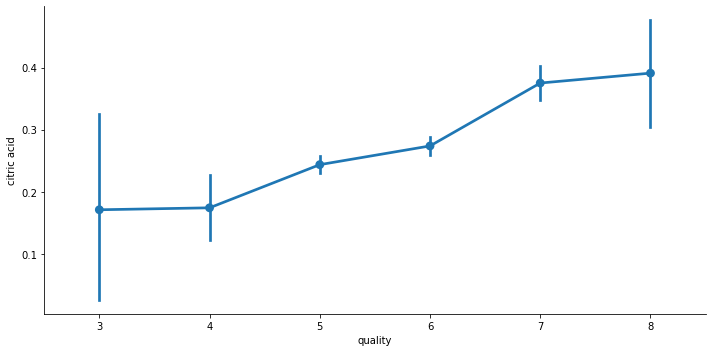

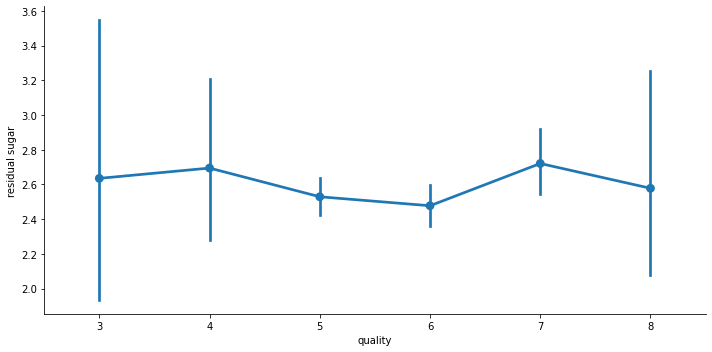

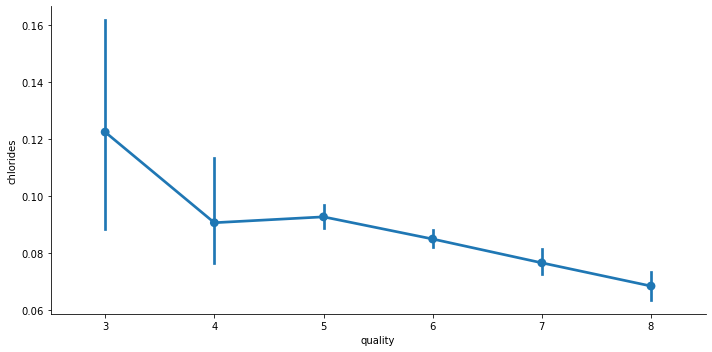

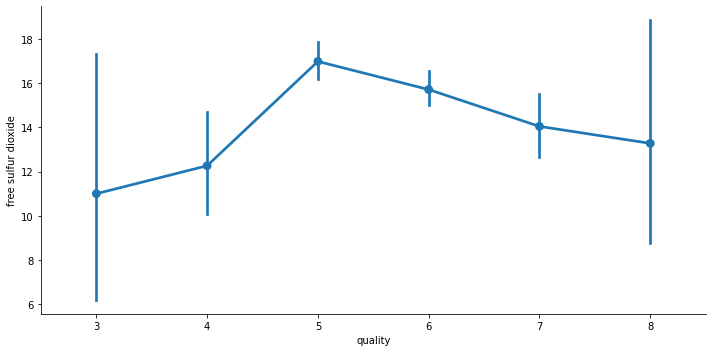

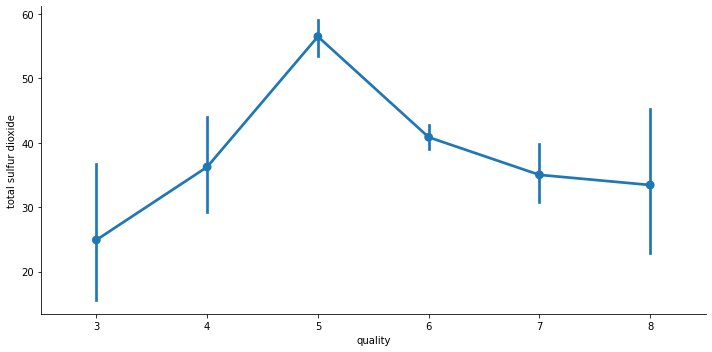

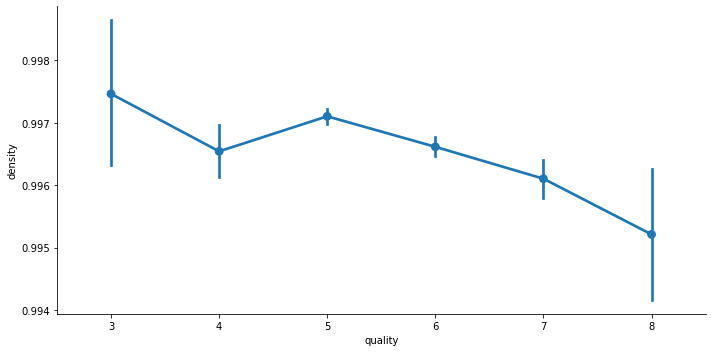

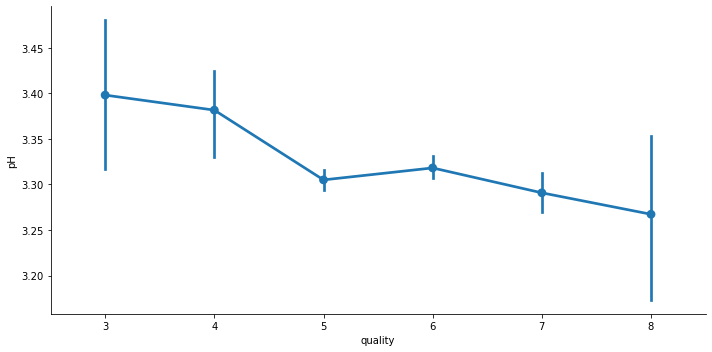

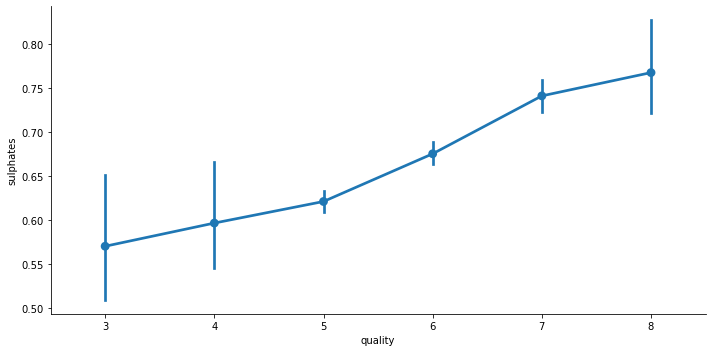

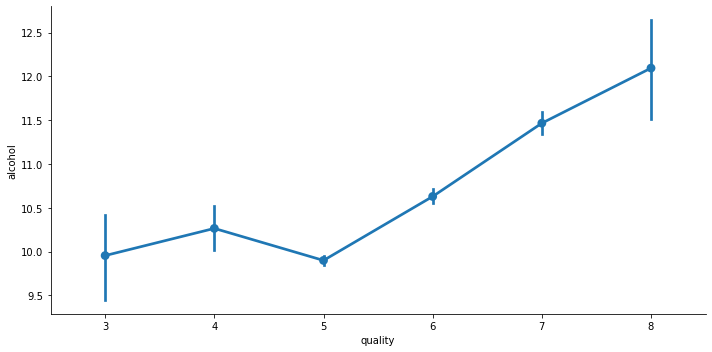

In [5]:
for i, col in enumerate(list(wine.drop('quality', axis=1).columns)):
    plt.figure(i)
    sns.catplot(x='quality', y=col, data=wine, kind='point', aspect=2, )

### Data Preparation

#### Explore the dataset further
*TODO*
<li>Check for missing values and handle if any</li>
<li>Check for outliers if any and handle them</li>
<li>Implement Correlation heatmap</li>
<li>Check the distribution of data using histograms</li>
<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li> (masalan feature scaling mitoonim anjam bedim ba standard scalar chon ke az plot e outlier ha mishe fahmid ke scale ashoon aslaaan yeki nist)

There are no missing values in our dataset.

<AxesSubplot:>

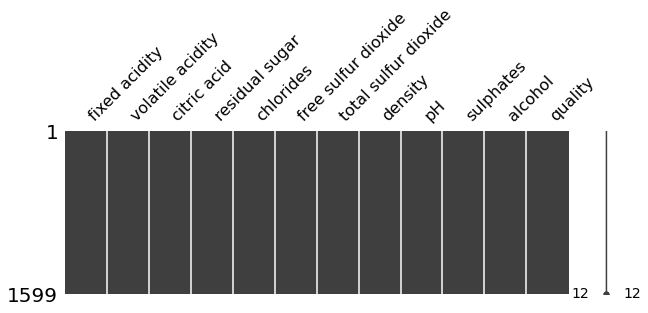

In [6]:
# Check for missing values and handle if any
import missingno as msno

msno.matrix(wine,figsize=(10,3))

There are obviously some outliers in our dataset which need to be handled. Also, from this graph we can see that the features are not on the same scale so we have class imbalance which we will need to handle using feature scaling.

<AxesSubplot:>

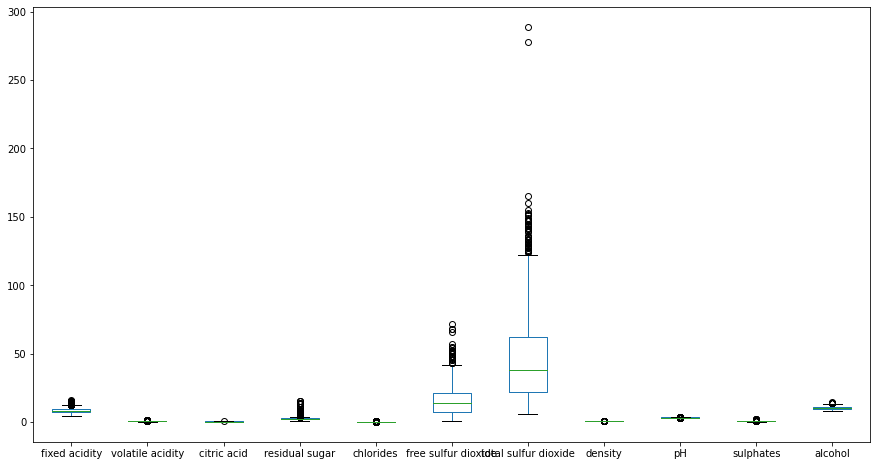

In [7]:
# Check for outliers if any and handle them
fig = plt.figure(figsize = (15,8))
wine.drop(['quality'], axis=1).boxplot(grid=False)

As the number of outliers detected in total are more than 25% of our dataset, then not dropping them would be more reasonable. We will try to cap and floor the outliers by the 10th and 90th percentile.

In [8]:
# handling the outliers present

df = wine.copy()

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# This part of the code is taken from StackOverflow
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Number of outliers detected %d" % (len(wine) - len(df)))
print("Proportion of outliers to the whole dataset is %f" % ((len(wine) - len(df))/len(wine)))

Number of outliers detected 420
Proportion of outliers to the whole dataset is 0.262664


In [9]:
# handling the outliers present

df = wine.copy()

tenth_percentile = df.quantile(0.1)
ninetieth_percentile = df.quantile(0.9)

df = df.drop(['quality'], axis=1).clip(tenth_percentile, ninetieth_percentile, axis = 1)

# savng the dataframe for future use
df = df.assign(quality = wine['quality'])
wineMod = df

wineMod.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.010,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.745,0.010,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.745,0.040,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,10.7,0.310,0.522,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.010,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The correlation heatmap shows that there is no feature that is highly correlated (correlation > 0.5) with the `quality` of the wines.

<AxesSubplot:>

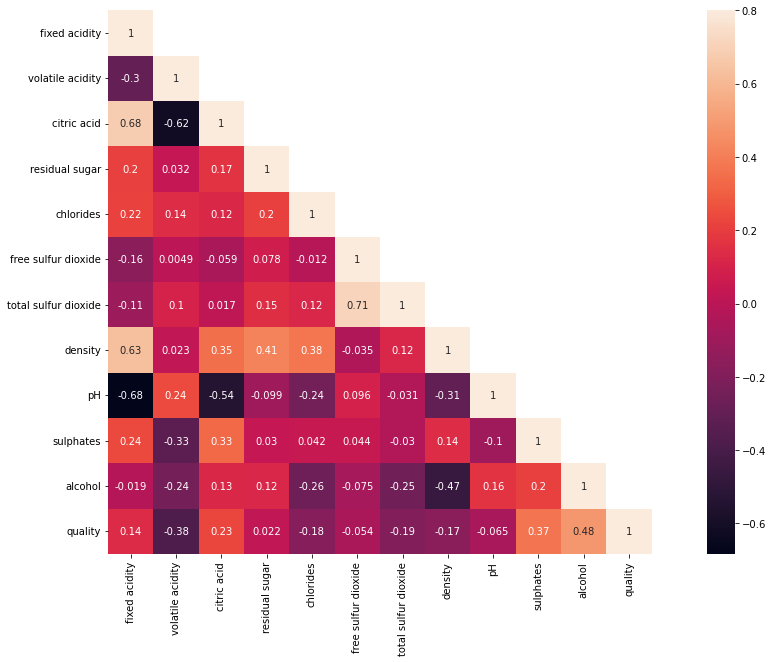

In [10]:
# Implement Correlation heatmap

corrMatt = wineMod.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In the below graphs, we can see the distribution of data which would help us have a basic understanding of effects of different features on the quality of the wine.

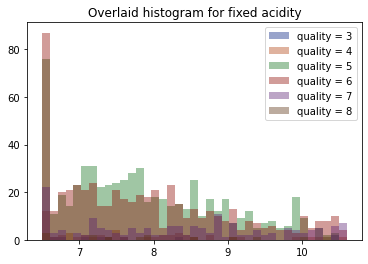

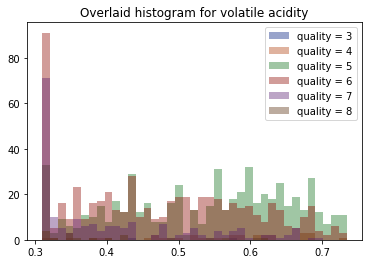

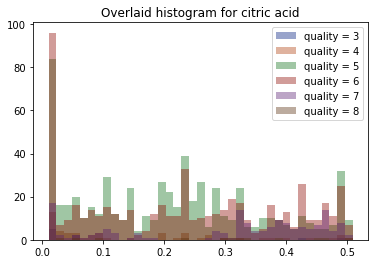

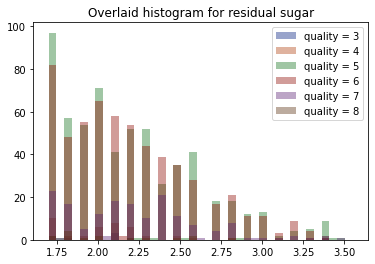

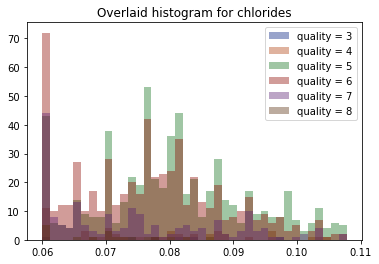

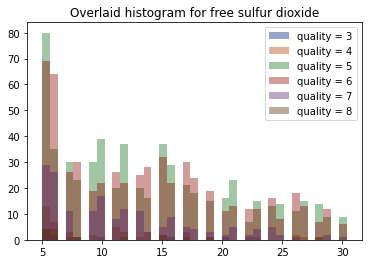

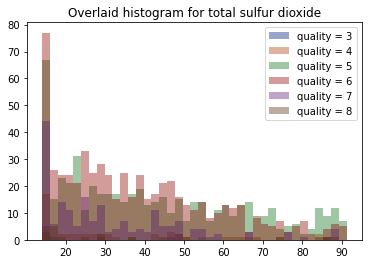

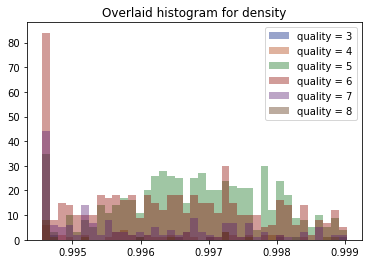

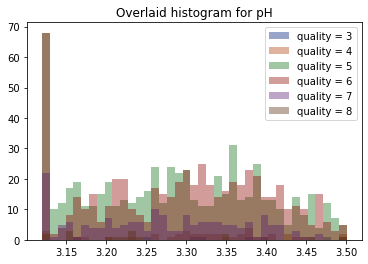

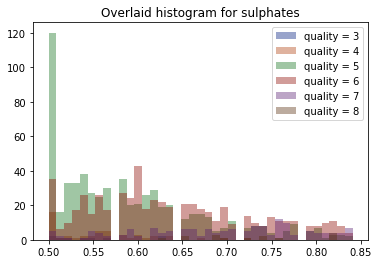

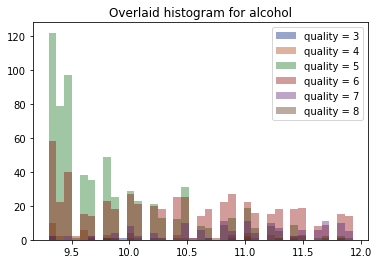

In [11]:
# Check the distribution of data using histograms

sns.set_palette("dark")
features = list(wineMod.drop(['quality'], axis = 1).columns.values)
for i in features:
    quality3 = list(wineMod[wineMod['quality'] == 3][i].dropna())
    quality4 = list(wineMod[wineMod['quality'] == 4][i].dropna())
    quality5 = list(wineMod[wineMod['quality'] == 5][i].dropna())
    quality6 = list(wineMod[wineMod['quality'] == 6][i].dropna())
    quality7 = list(wineMod[wineMod['quality'] == 7][i].dropna())
    quality8 = list(wineMod[wineMod['quality'] == 8][i].dropna())
    xmin = min(min(quality3), min(quality4), min(quality5), min(quality6), min(quality7), min(quality8))
    xmax = max(max(quality3), max(quality4), max(quality5), max(quality6), max(quality7), max(quality8))
    width = (xmax - xmin) / 40
    sns.distplot(quality3, kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(quality4, kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(quality5, kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(quality6, kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(quality7, kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(quality8, kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['quality = 3', 'quality = 4', 'quality = 5', 'quality = 6', 'quality = 7', 'quality = 8'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

As we have mentioned earlier, the features are not on the same scale and we have class imbalance in our dataset. To fix this issue, we implement feature scaling by standard scalar.

In [12]:
# Prepare the data for modeling by carrying out any steps that you think are necessary
features = wineMod.drop('quality', axis=1)
labels = wineMod['quality']

# Creating Test and Train data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# implementing feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Modeling

<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>
<li>Implement a Neural Network using Tensorflow and Keras to classify wine quality</li>

In [13]:
# Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice

# First Multivariable Linear Regression (Random Forest)
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=500)
rfModel.fit(X_train,y_train)
rfPreds = rfModel.predict(X_test)


# Second Multivariable Linear Regression Model (Gradient Boosting)
# We used GridSearchCV to find the best hyperparameters but as the output was large, we just used the hyperparameters we got from our GridSearch
from sklearn.ensemble import GradientBoostingRegressor

# parametersGb = {
#     "n_estimators":[5,50,250,500],
#     "max_depth":[1,3,5,7,9],
#     "learning_rate":[0.01,0.1,1,10,100]
# }
# gbGrid = GridSearchCV(GradientBoostingRegressor(), parametersGb, cv = 5)
# gbModel = gbGrid.fit(X_train, y_train)

gbModel = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=250)
gbModel.fit(X_train,y_train)
gbPreds = gbModel.predict(X_test)

In [14]:
# Implement a Neural Network using Tensorflow and Keras to classify wine quality
import tensorflow as tf
tf.version.VERSION
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

n_classes = 10
y_train_nn = to_categorical(y_train, n_classes)
y_test_nn = to_categorical(y_test, n_classes)

nnModel = Sequential()
nnModel.add(Dense(5, activation='relu', input_shape=(11,)))
nnModel.add(Dense(10, activation='softmax'))

In [15]:
nnModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 60        
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Neural Network Model Configuration
nnModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Neural Network Model Training
history = nnModel.fit(X_train, y_train_nn, batch_size=128, epochs=200, verbose=1, validation_data=(X_test, y_test_nn))

Epoch 1/200
10/10 [==============================] - 1s 31ms/step - loss: 2.7089 - accuracy: 0.0868 - val_loss: 2.6831 - val_accuracy: 0.0938
Epoch 2/200
10/10 [==============================] - 0s 7ms/step - loss: 2.6298 - accuracy: 0.1032 - val_loss: 2.6036 - val_accuracy: 0.1125
Epoch 3/200
10/10 [==============================] - 0s 6ms/step - loss: 2.5549 - accuracy: 0.1235 - val_loss: 2.5281 - val_accuracy: 0.1562
Epoch 4/200
10/10 [==============================] - 0s 5ms/step - loss: 2.4843 - accuracy: 0.1540 - val_loss: 2.4571 - val_accuracy: 0.1750
Epoch 5/200
10/10 [==============================] - 0s 6ms/step - loss: 2.4177 - accuracy: 0.1775 - val_loss: 2.3905 - val_accuracy: 0.1937
Epoch 6/200
10/10 [==============================] - 0s 5ms/step - loss: 2.3565 - accuracy: 0.2064 - val_loss: 2.3276 - val_accuracy: 0.2094
Epoch 7/200
10/10 [==============================] - 0s 5ms/step - loss: 2.2982 - accuracy: 0.2103 - val_loss: 2.2691 - val_accuracy: 0.2125
Epoch 8/200


Epoch 59/200
10/10 [==============================] - 0s 6ms/step - loss: 1.1919 - accuracy: 0.5442 - val_loss: 1.1878 - val_accuracy: 0.5375
Epoch 60/200
10/10 [==============================] - 0s 6ms/step - loss: 1.1840 - accuracy: 0.5481 - val_loss: 1.1808 - val_accuracy: 0.5375
Epoch 61/200
10/10 [==============================] - 0s 5ms/step - loss: 1.1763 - accuracy: 0.5504 - val_loss: 1.1738 - val_accuracy: 0.5406
Epoch 62/200
10/10 [==============================] - 0s 5ms/step - loss: 1.1689 - accuracy: 0.5559 - val_loss: 1.1669 - val_accuracy: 0.5500
Epoch 63/200
10/10 [==============================] - 0s 5ms/step - loss: 1.1618 - accuracy: 0.5582 - val_loss: 1.1602 - val_accuracy: 0.5531
Epoch 64/200
10/10 [==============================] - 0s 6ms/step - loss: 1.1548 - accuracy: 0.5629 - val_loss: 1.1540 - val_accuracy: 0.5531
Epoch 65/200
10/10 [==============================] - 0s 5ms/step - loss: 1.1479 - accuracy: 0.5653 - val_loss: 1.1480 - val_accuracy: 0.5531
Epoch 

10/10 [==============================] - 0s 5ms/step - loss: 0.9424 - accuracy: 0.5942 - val_loss: 0.9514 - val_accuracy: 0.5844
Epoch 174/200
10/10 [==============================] - 0s 6ms/step - loss: 0.9417 - accuracy: 0.5927 - val_loss: 0.9507 - val_accuracy: 0.5844
Epoch 175/200
10/10 [==============================] - 0s 6ms/step - loss: 0.9413 - accuracy: 0.5927 - val_loss: 0.9498 - val_accuracy: 0.5938
Epoch 176/200
10/10 [==============================] - 0s 5ms/step - loss: 0.9409 - accuracy: 0.5942 - val_loss: 0.9491 - val_accuracy: 0.5875
Epoch 177/200
10/10 [==============================] - 0s 6ms/step - loss: 0.9403 - accuracy: 0.5927 - val_loss: 0.9486 - val_accuracy: 0.5938
Epoch 178/200
10/10 [==============================] - 0s 6ms/step - loss: 0.9399 - accuracy: 0.5934 - val_loss: 0.9480 - val_accuracy: 0.5969
Epoch 179/200
10/10 [==============================] - 0s 6ms/step - loss: 0.9394 - accuracy: 0.5934 - val_loss: 0.9473 - val_accuracy: 0.5938
Epoch 180/200

### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


**Regression model evaluation metrics**

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "https://4.bp.blogspot.com/-wG7IbjTfE6k/XGUvqm7TCVI/AAAAAAAAAZU/vpH1kuKTIooKTcVlnm1EVRCXLVZM9cPNgCLcBGAs/s1600/formula-MAE-MSE-RMSE-RSquared.JPG">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

**Classification model evaluation metrics**

<img src="https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm">

**For Regression models**
<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

**For Classification model**
<li> Plot training loss and validation loss </li>
<li> Plot training accuracy and validation accuracy </li>
<li> Evaluate the classsification model using Precision, Recall and Accuracy metrics </li>

#### Evaluation of Regression models

The Random Forest model has better scores in all of the R^2, RMSE, and MAE than the Gradient Boosting model as it is shown below. Random Forest model has R^2 of 0.53 whereas the Gradient Boosting model's R^2 is 0.49 (the higher, the better). Random forest has RMSE and MAE of 0.56, and 0.42, respectively, whereas the Gradient Boosting model has RMSE and MAE of 0.58, and 0.45 (the lower, the better).

In [17]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from math import sqrt

def r2(y_, y):
    return r2_score(y_, y)
def rmse(y_, y):
    return sqrt(mean_squared_error(y_, y))
def mae(y_, y):
    return mean_absolute_error(y_, y)

print('Random Forest scores: R^2: {}, RMSE: {}, MAE: {}'.format(r2(y_test, rfPreds), rmse(y_test, rfPreds), mae(y_test, rfPreds)))
print('Gradient Boosting scores: R^2: {}, RMSE: {}, MAE: {}'.format(r2(y_test, gbPreds), rmse(y_test, gbPreds), mae(y_test, gbPreds)))

Random Forest scores: R^2: 0.5237219061850895, RMSE: 0.5578983106265872, MAE: 0.42939999999999995
Gradient Boosting scores: R^2: 0.48972586316712086, RMSE: 0.5774661360701656, MAE: 0.4515129888215445


As we can see from the below graphs, both of our regression models, had almost the same determination for features' importance. The highest feature importance is related to the `alcohol` feature which was predictable as the `alcohol` had the highest correlation with the wine's `quality`.

Random Forest Regression Feature Importance: 
Feature:        fixed acidity, Score: 0.05458
Feature:     volatile acidity, Score: 0.09749
Feature:          citric acid, Score: 0.05529
Feature:       residual sugar, Score: 0.04788
Feature:            chlorides, Score: 0.06904
Feature:  free sulfur dioxide, Score: 0.05178
Feature: total sulfur dioxide, Score: 0.08317
Feature:              density, Score: 0.05652
Feature:                   pH, Score: 0.05768
Feature:            sulphates, Score: 0.15882
Feature:              alcohol, Score: 0.26774


Gradient Boosting Regression Feature Importance: 
Feature:        fixed acidity, Score: 0.06297
Feature:     volatile acidity, Score: 0.10438
Feature:          citric acid, Score: 0.04191
Feature:       residual sugar, Score: 0.02639
Feature:            chlorides, Score: 0.06071
Feature:  free sulfur dioxide, Score: 0.03230
Feature: total sulfur dioxide, Score: 0.08289
Feature:              density, Score: 0.05654
Feature:                   p

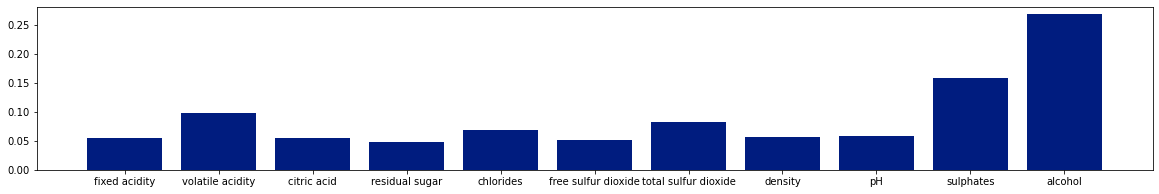



Gradient Boosting Regression Feature Importance Plot: 


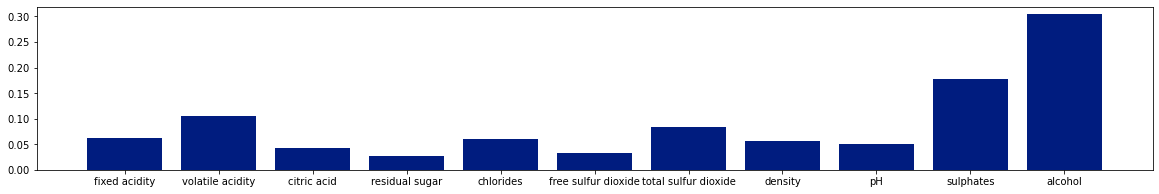

In [18]:
# Calculating feature importance
from matplotlib import pyplot

rfImportance = rfModel.feature_importances_
gbImportance = gbModel.feature_importances_

featuresNames = list(wineMod.columns)
# summarize feature importance
print("Random Forest Regression Feature Importance: ")
for i,v in enumerate(rfImportance):
    print('Feature: %20s, Score: %.5f' % (featuresNames[i],v))

print("\n\nGradient Boosting Regression Feature Importance: ")
for i,v in enumerate(gbImportance):
    print('Feature: %20s, Score: %.5f' % (featuresNames[i],v))

# plot feature importance
print("\n\nRandom Forest Regression Feature Importance Plot: ")
pyplot.figure(figsize=(20, 3))
pyplot.bar(featuresNames[:-1], list(rfImportance))
pyplot.show()

print("\n\nGradient Boosting Regression Feature Importance Plot: ")
pyplot.figure(figsize=(20, 3))
pyplot.bar(featuresNames[:-1], list(gbImportance))
pyplot.show()

#### Evaluation of Classification model

As we can see from the below graphs, our Neural Network performs how it should perform meaning that our model did not overfit, or underfit the training data and we have almost the same accuracy scores for both of train and test sets. The training loss and test loss are the same too meaning that the model's loss would be around the same for the unseen data.

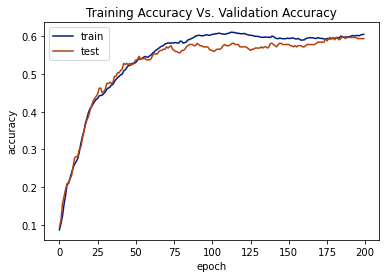

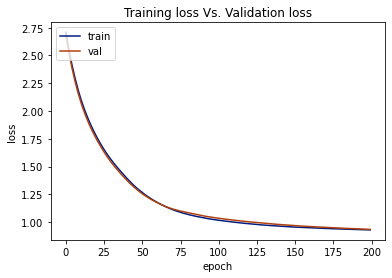

In [19]:
# Got this code from Stack Overflow
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy Vs. Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training loss Vs. Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

The Neural Network model we have trained, has the scores of:
- Accuracy: 0.59
- Precision (weighted): 0.56
- Recall (weighted): 0.59

In [20]:
y_predict = nnModel.predict(X_test)
y_predict_num = np.argmax(y_predict, axis=1)

# Got this code from https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_predict_num)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_predict_num, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_predict_num, average='weighted')
print('Recall: %f' % recall)

Accuracy: 0.593750
Precision: 0.559540
Recall: 0.593750


### Conclusion

The scores of our regression models:
- Random Forest scores: 
  - R^2: 0.52
  - RMSE: 0.56
  - MAE: 0.43
- Gradient Boosting scores: 
  - R^2: 0.49
  - RMSE: 0.58
  - MAE: 0.45


The scores of our classification model (NN):
- Accuracy: 0.59
- Precision: 0.56
- Recall: 0.59

By comparing the performance scores, we can conclude that the Neural Network model performs much better than the other two regression models. Since the `wine quality` dataset contains lots of features and moderate correlations between many of the features, the relationships between different attributes of the dataset is hard to obtain and regression models are not good at finding complex relationships. But, the Neural Network models can be very useful to obtain these relationships as they are very good at very complex tasks. However, the Neural Network models need a very large amount of data which we do not have and due to that our classification model's performance scores were not as high as it could have been. 

